# Relatório de Análise VIII

## Indentificando e Removendo Outliers

In [20]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
plt.rc('figure', figsize = (14,6))

In [21]:
dados = pd.read_csv('dados/aluguel_residencial.csv', sep = ';')

<Axes: >

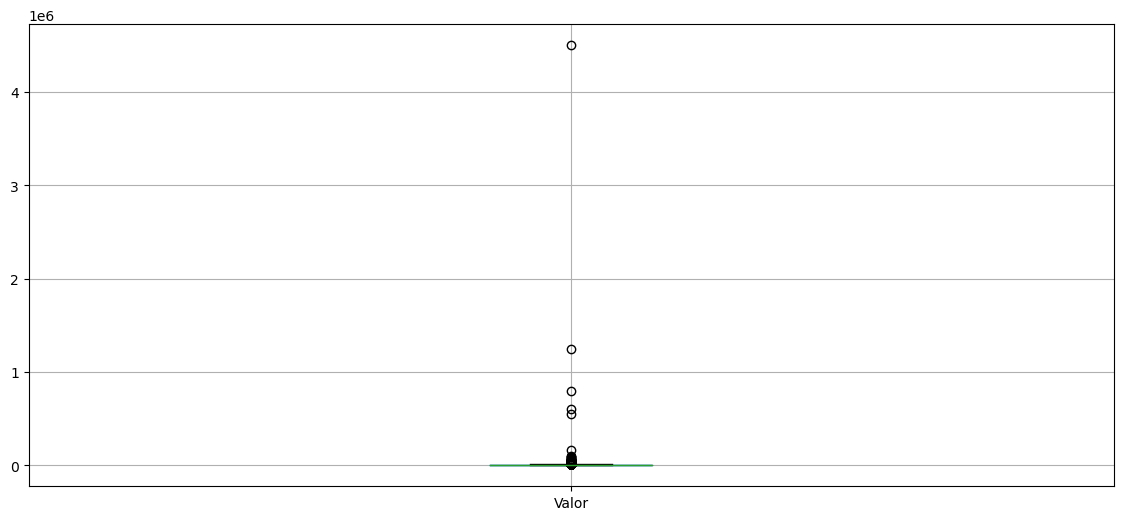

In [22]:
dados.boxplot(['Valor'])

In [23]:
dados[dados['Valor'] >= 500000]

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
7629,Apartamento,Barra da Tijuca,1,1,0,65,600000.0,980.0,120.0,9230.77,Apartamento
10636,Casa de Condomínio,Freguesia (Jacarepaguá),4,2,3,163,800000.0,900.0,0.0,4907.98,Apartamento
12661,Apartamento,Freguesia (Jacarepaguá),2,2,1,150,550000.0,850.0,150.0,3666.67,Apartamento
13846,Apartamento,Recreio dos Bandeirantes,3,2,1,167,1250000.0,1186.0,320.0,7485.03,Apartamento
15520,Apartamento,Botafogo,4,1,1,300,4500000.0,1100.0,0.0,15000.00,Apartamento


In [24]:
valor = dados['Valor']
valor

0        1700.0
1        7000.0
2         800.0
3         800.0
4        1300.0
          ...  
21821     900.0
21822     800.0
21823    1800.0
21824    1400.0
21825    3000.0
Name: Valor, Length: 21826, dtype: float64

In [25]:
Q1= valor.quantile(.25)
Q3= valor.quantile(.75)
IIQ = Q3 -Q1
limite_inferior = Q1 - 1.5 *IIQ
limite_superior = Q3 + 1.5 *IIQ

In [26]:
selecao = (valor >= limite_inferior) & (valor <= limite_superior)
dados_new = dados[selecao]

<Axes: >

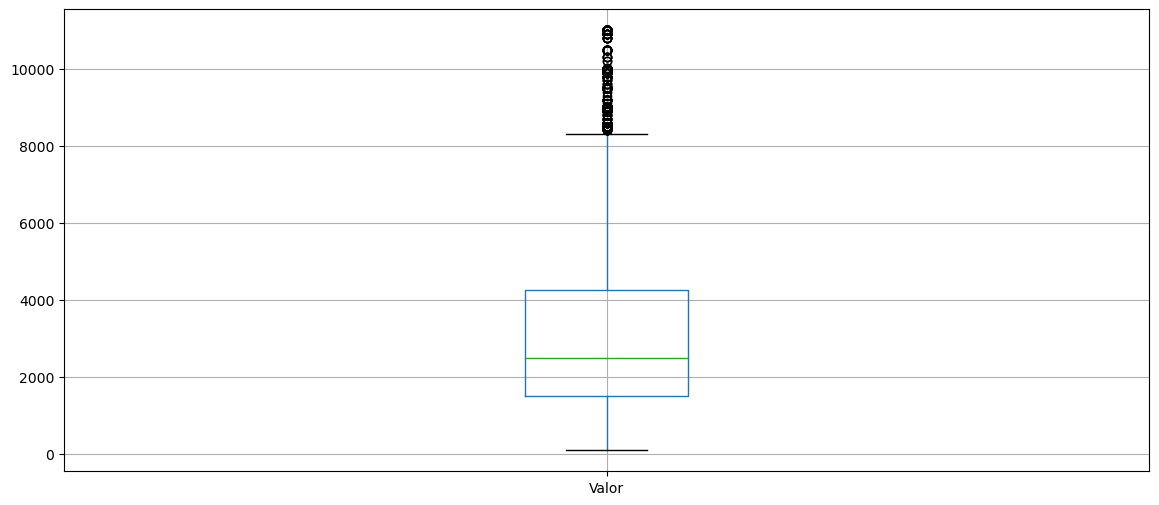

In [27]:
dados_new.boxplot(['Valor'])

array([[<Axes: title={'center': 'Valor'}>]], dtype=object)

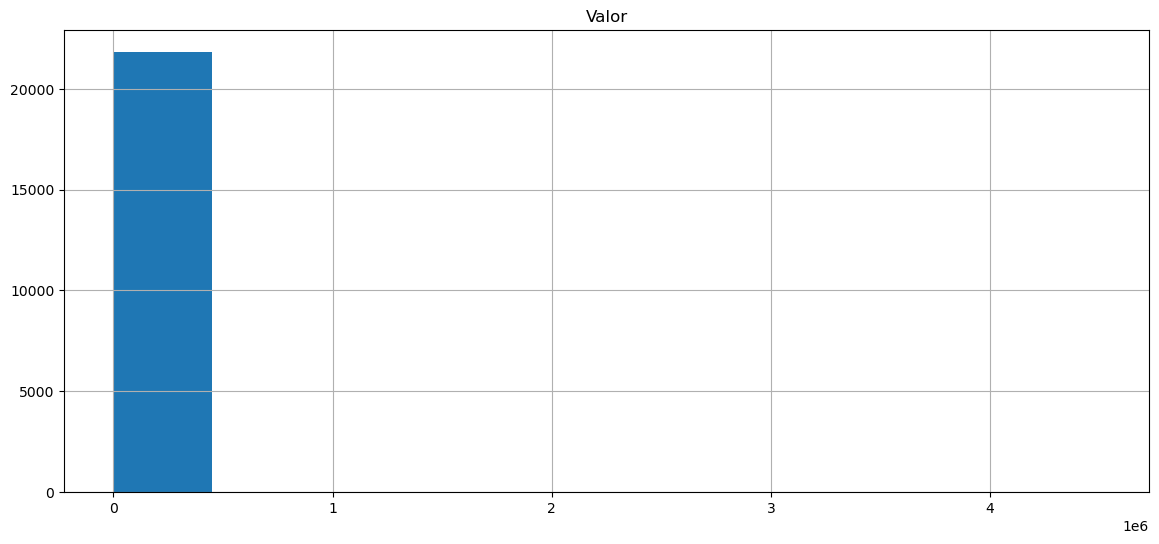

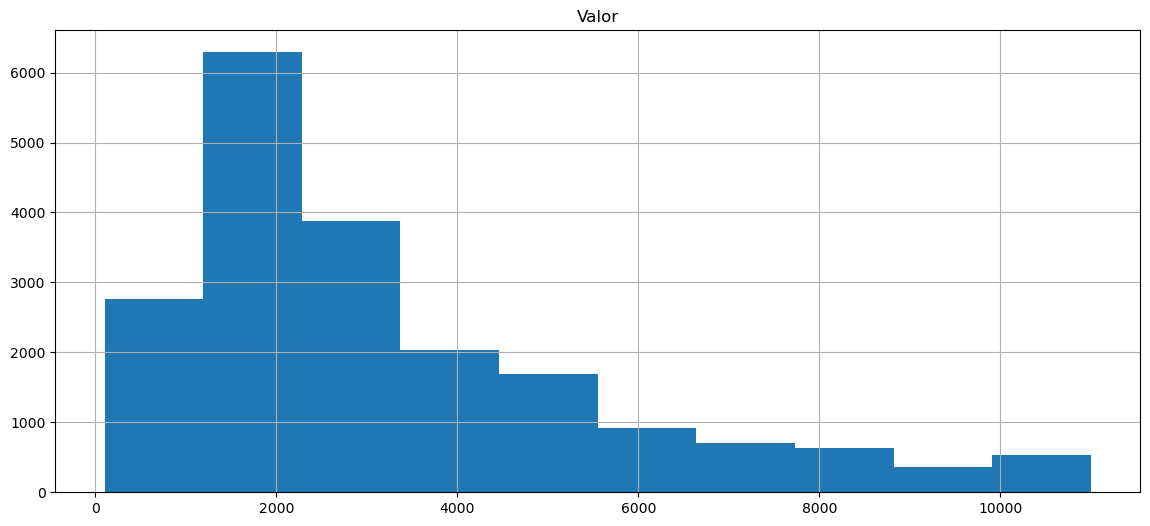

In [28]:
dados.hist(['Valor'])
dados_new.hist(['Valor'])

<Axes: title={'center': 'Valor'}, xlabel='[Tipo]'>

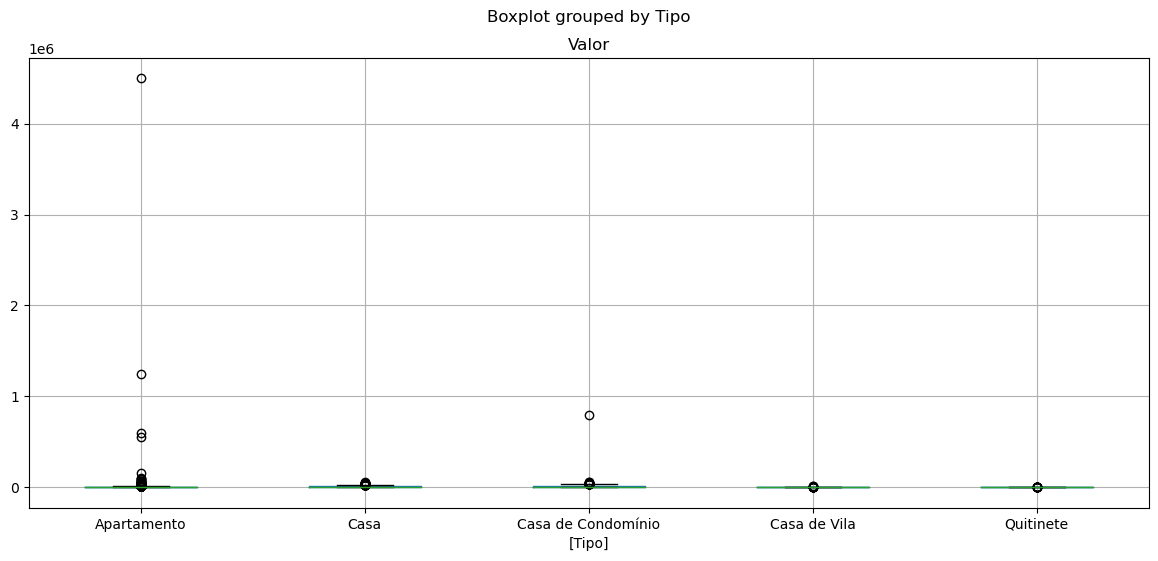

In [30]:
dados.boxplot(['Valor'], by = ['Tipo'])